# Classification of Financial Stress Level Using Random Forest.

## Preliminary Preparation

### 1. Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LassoCV, Ridge
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

### 2. Loading and Exploring Dataset

In [77]:
file_name='data_cleaned.csv'
df=pd.read_csv(file_name)
df.head()

,Serial_No,Period,Period.Year,Period.Quarter,Period.Month,Period.Day,Job_Market_Difficulty,Good_Time_For_Large_Purchase,Future_Spend_On_Large_Purchases,Able_To_Meet_Regular_Expenses,...,Dealing_With_Rising_Prices,Borrowed_Money_For_Rising_Prices,Reason_For_Price_Increase,Stress_Level,Combat_Price_Increase,Curb_Inflation_Methods,Eating_Habits_Change,Meat_Milk_Habits_Change,Alcohol_Types_Drunk,Alcohol_Category_Most_Drunk
0,R3229,2022-06-20,2022,2,6,20,Difficult,Yes,Same,No,...,Delayed non-essential purchases,"No, have not borrowed",Impact of COVID-19 pandemic,Quite stressful,Governments should support the local productio...,"I stopped specific diets e.g Keto, Vegan, Glut...",NaN,NaN,NaN,NaN
1,R3377,2022-06-20,2022,2,6,20,Difficult,Yes,More,Maybe,...,"Other changes in purchasing habits (e.g., buyi...","Yes, had to borrow a few times",Impact of Russia's invasion of Ukraine,Quite stressful,People should save more,I am going to bars less often;I am purchasing ...,NaN,NaN,NaN,NaN
2,R2149,2022-11-20,2022,4,11,20,Difficult,No,Less,Yes,...,Searched for sales and promotions;Purchased ch...,"Yes, had to borrow a few times",Impact of Russia's invasion of Ukraine,Quite stressful,People should spend less;People should save more,I am purchasing less produce;I am purchasing l...,NaN,NaN,NaN,NaN
3,R3410,2022-06-20,2022,2,6,20,Difficult,Maybe,More,Maybe,...,Searched for sales and promotions;Purchased ch...,"Yes, had to borrow often",Impact of Russia's invasion of Ukraine,Quite stressful,Governments should support the local productio...,I am eating out at restaurants less often;I am...,NaN,NaN,NaN,NaN
4,R2099,2022-11-20,2022,4,11,20,Difficult,No,Less,Maybe,...,"Other changes in purchasing habits (e.g., buyi...","Yes, had to borrow a few times",Impact of COVID-19 pandemic,Quite stressful,Governments should support the local productio...,I am stocking up on cheap street/local market ...,NaN,NaN,NaN,NaN


In [78]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())

print(df[non_numeric_cols].head())

Non-numeric columns: ['Serial_No', 'Period', 'Job_Market_Difficulty', 'Good_Time_For_Large_Purchase', 'Future_Spend_On_Large_Purchases', 'Able_To_Meet_Regular_Expenses', 'Expected_Income_Change', 'Expected_Economic_Change_City', 'Expected_Economic_Change_Country', 'Earning_Difficulty', 'Country_Direction_Thoughts', 'Meals_Per_Day', 'Gender', 'Marital_Status', 'Age', 'Age_Group', 'Highest_Education_Level', 'Occupation', 'Population_Group', 'Children_Under_18', 'Household_Size', 'Total_Household_Income', 'Income_Level', 'Top_3_Concerns', 'Food_Beverages_Prices_Change', 'Utilities_Prices_Change', 'Furniture_Appliances_Prices_Change', 'Alcoholics_Prices_Change', 'Housing_Rent_Prices_Change', 'Transportation_Prices_Change', 'Clothing_Shoes_Prices_Change', 'Education_Prices_Change', 'Recreation_Prices_Change', 'Communication_Prices_Change', 'Concern_About_Rising_Prices', 'Rising_Prices_Impact_Day_To_Day_Expenses', 'Rising_Prices_Impact_Discretionary_Spending', 'Rising_Prices_Impact_Affordabl

## Encoding and Target-Feature Selection

### 3. Defining Target and Feature Selection

In [79]:
y=df[['Stress_Level']]


ordinal_cols = [
    "Job_Market_Difficulty", "Future_Spend_On_Large_Purchases", "Able_To_Meet_Regular_Expenses",
    "Expected_Income_Change", "Expected_Economic_Change_City", "Expected_Economic_Change_Country",
    "Earning_Difficulty", "Income_Level", "Utilities_Prices_Change", "Alcoholics_Prices_Change",
    "Furniture_Appliances_Prices_Change", "Housing_Rent_Prices_Change", "Transportation_Prices_Change",
    "Clothing_Shoes_Prices_Change", "Education_Prices_Change", "Recreation_Prices_Change",
    "Communication_Prices_Change", "Concern_About_Rising_Prices",
    "Rising_Prices_Impact_Organic_Food", "Rising_Prices_Impact_Day_To_Day_Expenses",
    "Rising_Prices_Impact_Healthcare", "Age_Group","Marital_Status"
]

Defining the feature matrix

In [80]:
X = df[ordinal_cols].copy()
X.head()

,Job_Market_Difficulty,Future_Spend_On_Large_Purchases,Able_To_Meet_Regular_Expenses,Expected_Income_Change,Expected_Economic_Change_City,Expected_Economic_Change_Country,Earning_Difficulty,Income_Level,Utilities_Prices_Change,Alcoholics_Prices_Change,...,Clothing_Shoes_Prices_Change,Education_Prices_Change,Recreation_Prices_Change,Communication_Prices_Change,Concern_About_Rising_Prices,Rising_Prices_Impact_Organic_Food,Rising_Prices_Impact_Day_To_Day_Expenses,Rising_Prices_Impact_Healthcare,Age_Group,Marital_Status
0,Difficult,Same,No,Stay the same,Stay the same,Stay the same,Same,Low Income,Price went up,Price went up,...,Price went up,Price went up,Price went up,Price went up,Quite concerned,Stayed the same,Stayed the same,Stayed the same,Gen X,Married
1,Difficult,More,Maybe,Stay the same,Stay the same,Stay the same,Difficult,Middle Income,Price stayed the same,Price went up,...,Price went up,Price went up,Price stayed the same,Price stayed the same,Not concerned,Stayed the same,Stayed the same,Worsened,Gen X,Dating
2,Difficult,Less,Yes,Stay the same,Worsen,Worsen,Difficult,Low Income,Price stayed the same,Price went up,...,Price went up,Price went up,Price went up,Price went up,Quite concerned,Worsened,Worsened,Worsened,Millennials,Married
3,Difficult,More,Maybe,Stay the same,Stay the same,Stay the same,Same,Middle Income,Price went up,Price went up,...,Price went up,Price went up,Price went up,Price went up,Quite concerned,Worsened,Worsened,Worsened,Millennials,Dating
4,Difficult,Less,Maybe,Improve,Improve,Improve,Difficult,Middle Income,Price dropped,Don't know/Don't buy,...,Price stayed the same,Price stayed the same,Price stayed the same,Price went up,Quite concerned,Worsened,Worsened,Worsened,Millennials,Married


Encoding the ordinal columns

In [81]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[ordinal_cols] = encoder.fit_transform(X[ordinal_cols])
X.head()

,Job_Market_Difficulty,Future_Spend_On_Large_Purchases,Able_To_Meet_Regular_Expenses,Expected_Income_Change,Expected_Economic_Change_City,Expected_Economic_Change_Country,Earning_Difficulty,Income_Level,Utilities_Prices_Change,Alcoholics_Prices_Change,...,Clothing_Shoes_Prices_Change,Education_Prices_Change,Recreation_Prices_Change,Communication_Prices_Change,Concern_About_Rising_Prices,Rising_Prices_Impact_Organic_Food,Rising_Prices_Impact_Day_To_Day_Expenses,Rising_Prices_Impact_Healthcare,Age_Group,Marital_Status
0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,...,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,3.0,...,3.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
2,0.0,0.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,3.0,...,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0
3,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,...,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0


## Training, Testing and Evaluation of the Model

Splitting the dataset for training and testing

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize and train the model


In [83]:
model = RandomForestClassifier(n_estimators=100, max_depth=20,min_samples_leaf=1,min_samples_split=5,random_state=42)
model.fit(X_train, y_train)

c:\Users\arnol\OneDrive\Documents\School\ML\Market-Analysis-Study\.venv\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Making the predictions of classes

In [84]:
y_pred = model.predict(X_test)

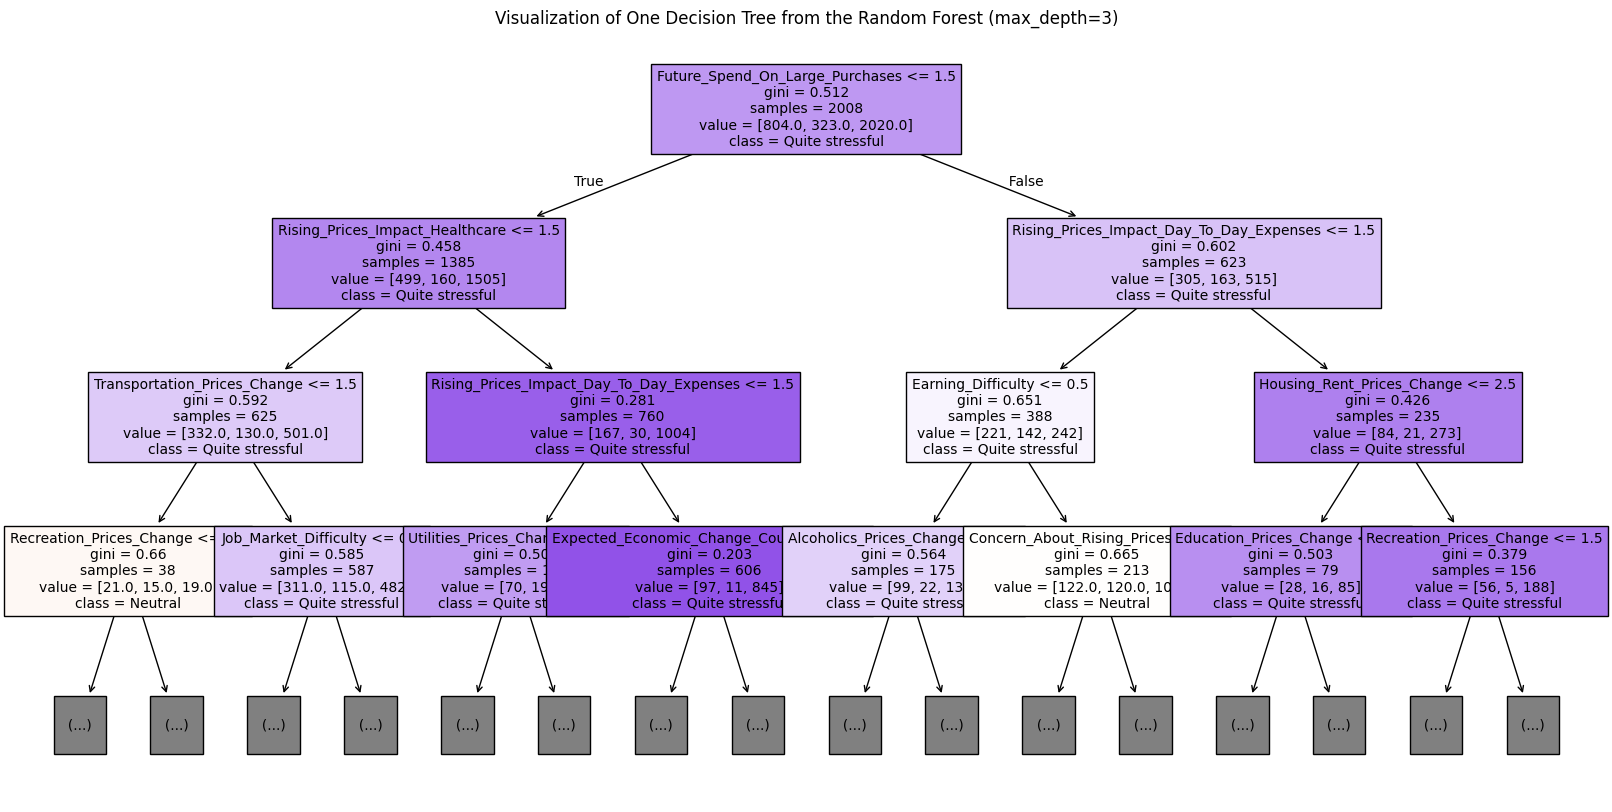

In [85]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model.estimators_[0],
    feature_names=X.columns,
    class_names=[str(cls) for cls in np.unique(y.values.ravel())],
    filled=True,
    max_depth=3,
    fontsize=10
)
plt.title("Visualization of One Decision Tree from the Random Forest (max_depth=3)")
plt.show()

Model evaluation

Confusion Matrix:
[[ 63   6 129]
 [ 23  30  27]
 [ 34   7 468]]


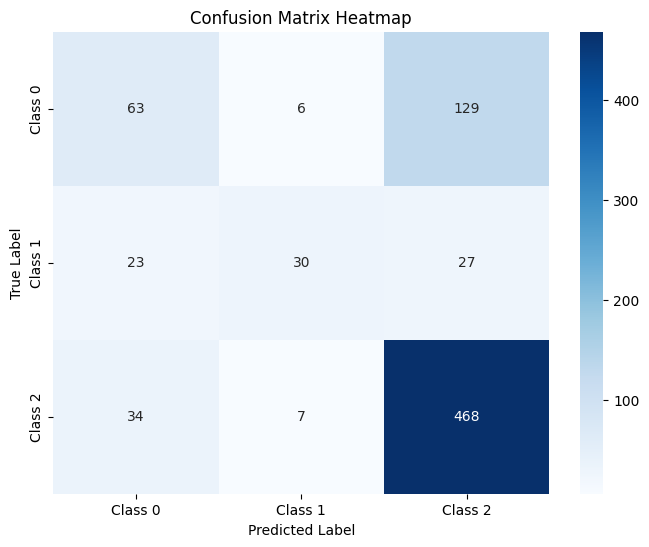

In [86]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix Heatmap')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

C:\Users\arnol\AppData\Local\Temp\ipykernel_13332\993828072.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")


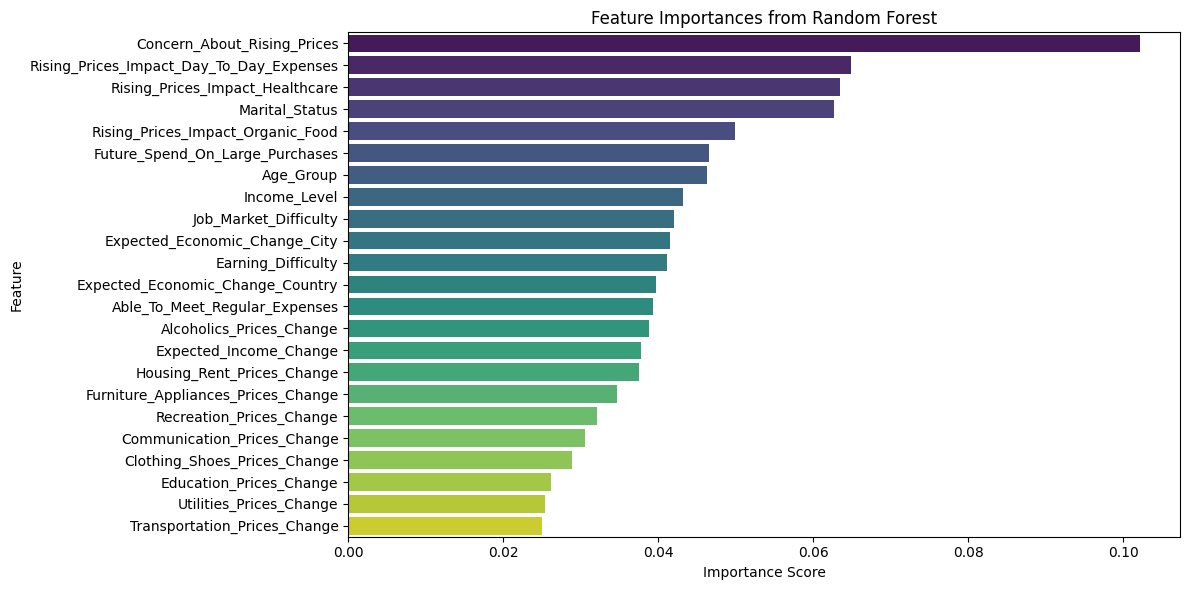

In [87]:
# Feature Importance Visualization
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [88]:
# Print feature importances with better formatting
print("Feature Importances:")
for i, (feature, importance) in enumerate(zip(feature_names, importances)):
    print(f"{i+1:2d}. {feature:30s}: {importance:.4f}")

Feature Importances:
 1. Job_Market_Difficulty         : 0.0420
 2. Future_Spend_On_Large_Purchases: 0.0466
 3. Able_To_Meet_Regular_Expenses : 0.0393
 4. Expected_Income_Change        : 0.0378
 5. Expected_Economic_Change_City : 0.0415
 6. Expected_Economic_Change_Country: 0.0397
 7. Earning_Difficulty            : 0.0411
 8. Income_Level                  : 0.0432
 9. Utilities_Prices_Change       : 0.0254
10. Alcoholics_Prices_Change      : 0.0388
11. Furniture_Appliances_Prices_Change: 0.0347
12. Housing_Rent_Prices_Change    : 0.0376
13. Transportation_Prices_Change  : 0.0250
14. Clothing_Shoes_Prices_Change  : 0.0289
15. Education_Prices_Change       : 0.0262
16. Recreation_Prices_Change      : 0.0321
17. Communication_Prices_Change   : 0.0306
18. Concern_About_Rising_Prices   : 0.1022
19. Rising_Prices_Impact_Organic_Food: 0.0499
20. Rising_Prices_Impact_Day_To_Day_Expenses: 0.0649
21. Rising_Prices_Impact_Healthcare: 0.0635
22. Age_Group                     : 0.0464
23. Marital_

In [89]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                 precision    recall  f1-score   support

        Neutral       0.53      0.32      0.40       198
  Not stressful       0.70      0.38      0.49        80
Quite stressful       0.75      0.92      0.83       509

       accuracy                           0.71       787
      macro avg       0.66      0.54      0.57       787
   weighted avg       0.69      0.71      0.68       787



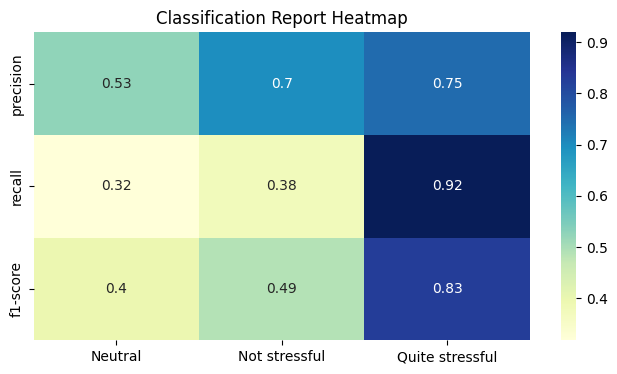

In [90]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :3]  # Remove support row
plt.figure(figsize=(8, 4))
sns.heatmap(report_df, annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()

4. Using the features with the highest importance to train

In [91]:
# Select top features based on importance scores
top_n = 10  # Number of top features to select
top_features = feature_names[indices[:top_n]]
print(f"Selected top {top_n} features:")
for i, feature in enumerate(top_features, 1):
    print(f"{i:2d}. {feature}")


Selected top 10 features:
 1. Concern_About_Rising_Prices
 2. Rising_Prices_Impact_Day_To_Day_Expenses
 3. Rising_Prices_Impact_Healthcare
 4. Marital_Status
 5. Rising_Prices_Impact_Organic_Food
 6. Future_Spend_On_Large_Purchases
 7. Age_Group
 8. Income_Level
 9. Job_Market_Difficulty
10. Expected_Economic_Change_City


In [92]:

# Create new feature matrix with only top features
X_selected = X[top_features]
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)


In [93]:

# Train Random Forest with selected features
model_selected = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    random_state=42
)
model_selected.fit(X_train_selected, y_train_selected.values.ravel())


,n_estimators,100
,criterion,'gini'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [94]:

# Make predictions with selected features
y_pred_selected = model_selected.predict(X_test_selected)


In [95]:

# Evaluate performance with selected features
print("\n" + "="*50)
print("PERFORMANCE WITH FEATURE SELECTION")
print("="*50)
print(f"Number of features used: {len(top_features)}")
print(f"Accuracy: {accuracy_score(y_test_selected, y_pred_selected):.4f}")
print(f"F1 Score: {f1_score(y_test_selected, y_pred_selected, average='weighted'):.4f}")



PERFORMANCE WITH FEATURE SELECTION
Number of features used: 10
Accuracy: 0.6900
F1 Score: 0.6676


In [96]:

# Compare with original performance
print("\n" + "="*50)
print("PERFORMANCE COMPARISON")
print("="*50)
print(f"Original features ({X.shape[1]}): Accuracy = {accuracy_score(y_test, y_pred):.4f}")
print(f"Selected features ({len(top_features)}): Accuracy = {accuracy_score(y_test_selected, y_pred_selected):.4f}")



PERFORMANCE COMPARISON
Original features (23): Accuracy = 0.7128
Selected features (10): Accuracy = 0.6900


In [97]:

# Feature importance for selected features
importances_selected = model_selected.feature_importances_
indices_selected = np.argsort(importances_selected)[::-1]


C:\Users\arnol\AppData\Local\Temp\ipykernel_13332\2898734889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_selected[indices_selected], y=top_features[indices_selected], palette="viridis")


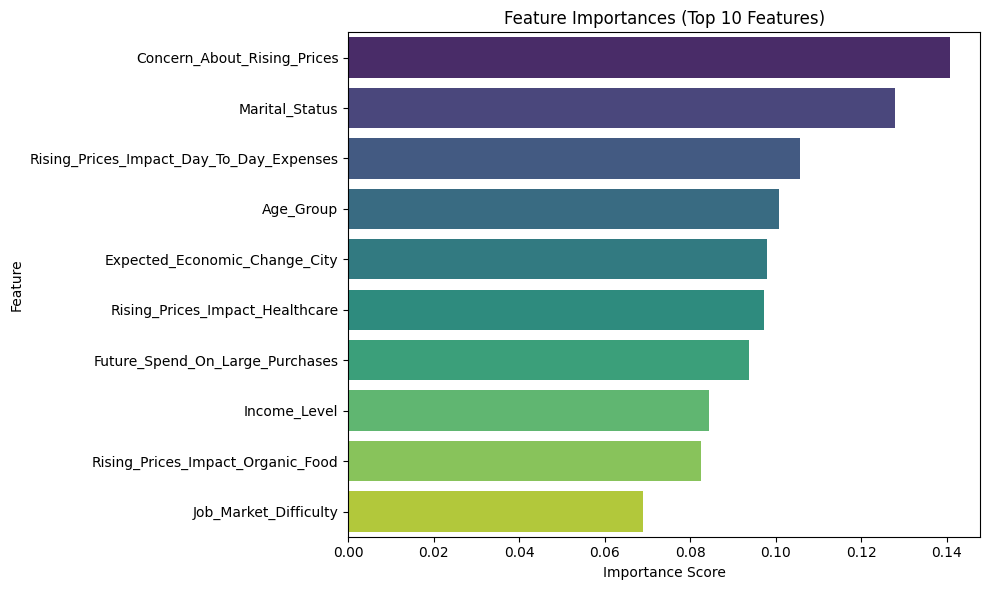

In [98]:

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_selected[indices_selected], y=top_features[indices_selected], palette="viridis")
plt.title(f"Feature Importances (Top {top_n} Features)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [99]:

# Classification report for selected features
print("\nClassification Report (Selected Features):")
print(classification_report(y_test_selected, y_pred_selected))



Classification Report (Selected Features):
                 precision    recall  f1-score   support

        Neutral       0.46      0.35      0.40       193
  Not stressful       0.69      0.32      0.44        84
Quite stressful       0.75      0.88      0.81       510

       accuracy                           0.69       787
      macro avg       0.63      0.52      0.55       787
   weighted avg       0.67      0.69      0.67       787



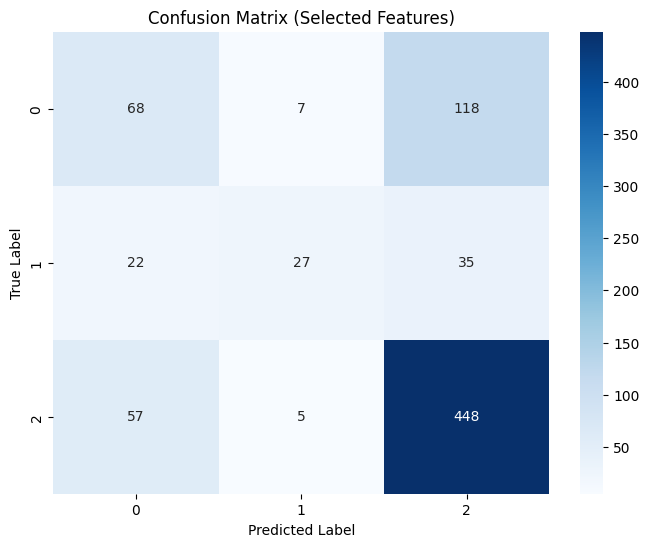

In [100]:

# Confusion matrix for selected features
plt.figure(figsize=(8, 6))
cm_selected = confusion_matrix(y_test_selected, y_pred_selected)
sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Selected Features)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


4. Hyperparameter Tuning Using Grid Search

In [101]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}


In [102]:
# # Add verbose output and better error handling
# grid_search = GridSearchCV(
#     RandomForestClassifier(random_state=42), 
#     param_grid, 
#     cv=5, 
#     scoring='f1_weighted',
#     verbose=2,  # Show progress during fitting
#     n_jobs=-1   # Use all available CPU cores
# )

# # Fit with proper error handling
# try:
#     grid_search.fit(X_train, y_train.values.ravel())
#     print(f"Grid search completed successfully!")
#     print(f"Best score: {grid_search.best_score_:.4f}")
# except Exception as e:
#     print(f"Error during grid search: {e}")
#     raise

In [103]:
# print("Best Parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

![Grid Search Output](gridSearchOutput.png)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

In [104]:
# Train a new Random Forest with the best parameters found
best_params = {
    'criterion': 'gini',
    'max_depth': 15,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 50,
    'random_state': 42
}

best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train.values.ravel())

,n_estimators,50
,criterion,'gini'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Confusion Matrix (Selected Features):
[[ 68   7 118]
 [ 22  27  35]
 [ 57   5 448]]


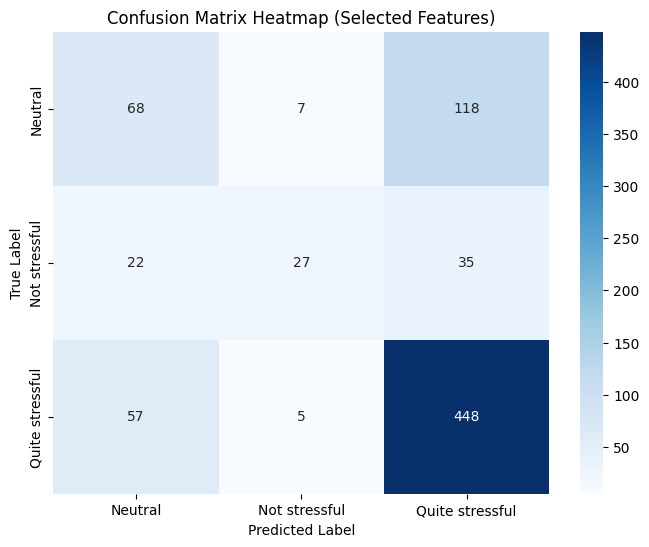

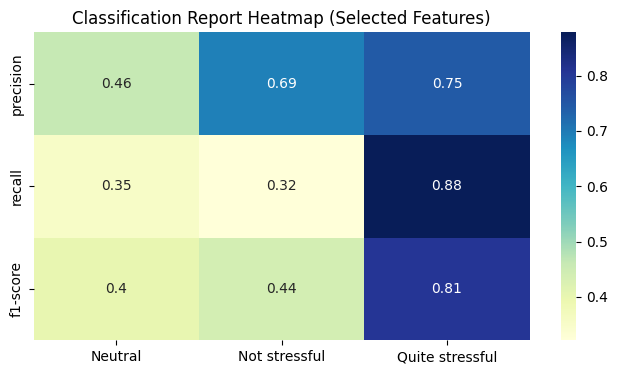


Classification Report (Selected Features):
                 precision    recall  f1-score   support

        Neutral       0.46      0.35      0.40       193
  Not stressful       0.69      0.32      0.44        84
Quite stressful       0.75      0.88      0.81       510

       accuracy                           0.69       787
      macro avg       0.63      0.52      0.55       787
   weighted avg       0.67      0.69      0.67       787


Accuracy (Selected Features): 0.6900
F1 Score (Selected Features): 0.6676


In [105]:
# Evaluation metrics for the model with selected features
print("Confusion Matrix (Selected Features):")
print(cm_selected)
# Plot confusion matrix heatmap for selected features
plt.figure(figsize=(8, 6))
sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Not stressful', 'Quite stressful'],
            yticklabels=['Neutral', 'Not stressful', 'Quite stressful'])
plt.title('Confusion Matrix Heatmap (Selected Features)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report heatmap for selected features
report_selected = classification_report(y_test_selected, y_pred_selected, output_dict=True)
report_selected_df = pd.DataFrame(report_selected).iloc[:-1, :3]  # Remove support row
plt.figure(figsize=(8, 4))
sns.heatmap(report_selected_df, annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap (Selected Features)")
plt.show()

print("\nClassification Report (Selected Features):")
print(classification_report(y_test_selected, y_pred_selected))

print(f"\nAccuracy (Selected Features): {accuracy_score(y_test_selected, y_pred_selected):.4f}")
print(f"F1 Score (Selected Features): {f1_score(y_test_selected, y_pred_selected, average='weighted'):.4f}")

In [116]:
from sklearn.linear_model import LogisticRegression
# Train a logistic regression model with L2 regularization (Ridge)
logreg = LogisticRegression(
    penalty='l2',            # Use L2 regularization (Ridge)
    C=1.0,                   # Inverse of regularization strength; smaller values specify stronger regularization
    solver='lbfgs',          # Optimization algorithm to use (good for multinomial problems) - as opposed to lib-linear
    max_iter=1000,           # Maximum number of iterations for the solver to converge
    multi_class='multinomial', # Use multinomial loss for multi-class classification
    random_state=42          # Seed for reproducibility
)
logreg.fit(X_train_selected, y_train_selected.values.ravel())

# Predict on the test set
y_pred_logreg = logreg.predict(X_test_selected)

# Evaluate performance
print("Logistic Regression with L2 Regularization (Selected Features):")
print(classification_report(y_test_selected, y_pred_logreg))
print(f"Accuracy: {accuracy_score(y_test_selected, y_pred_logreg):.4f}")
print(f"F1 Score: {f1_score(y_test_selected, y_pred_logreg, average='weighted'):.4f}")


Logistic Regression with L2 Regularization (Selected Features):
                 precision    recall  f1-score   support

        Neutral       0.48      0.31      0.37       193
  Not stressful       0.27      0.05      0.08        84
Quite stressful       0.72      0.92      0.81       510

       accuracy                           0.67       787
      macro avg       0.49      0.42      0.42       787
   weighted avg       0.61      0.67      0.62       787

Accuracy: 0.6747
F1 Score: 0.6234


c:\Users\arnol\OneDrive\Documents\School\ML\Market-Analysis-Study\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
